In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
ad=pd.read_csv('Advertising.csv')

In [3]:
ad

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
ad.shape

(200, 5)

In [6]:
ad.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


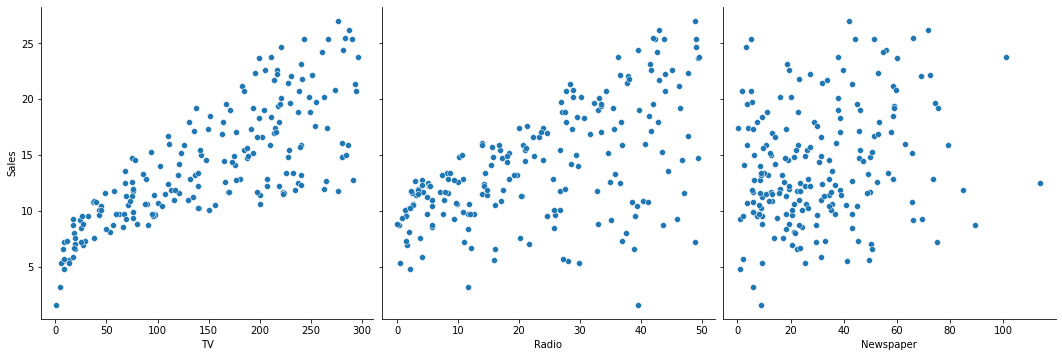

In [7]:
sns.pairplot(ad,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=5)

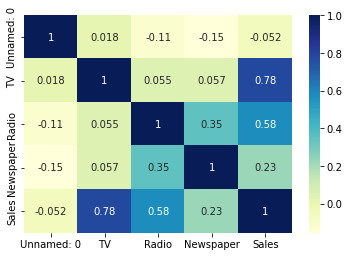

In [8]:
sns.heatmap(ad.corr(),annot=True,cmap='YlGnBu')

In [9]:
x=ad['TV']
y=ad['Sales']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=5)

In [11]:
x_train.head()


170     50.0
182     56.2
59     210.7
185    205.0
12      23.8
Name: TV, dtype: float64

In [12]:
x_train_sm=sm.add_constant(x_train)

In [13]:
x_train_sm


,const,TV
170,1.0,50.0
182,1.0,56.2
59,1.0,210.7
185,1.0,205.0
12,1.0,23.8
...,...,...
73,1.0,129.4
144,1.0,96.2
118,1.0,125.7
189,1.0,18.7


In [14]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [15]:
lr.params

const    6.745302
TV       0.050244
dtype: float64

In [16]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     246.6
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           1.64e-32
Time:                        12:39:00   Log-Likelihood:                -363.07
No. Observations:                 140   AIC:                             730.1
Df Residuals:                     138   BIC:                             736.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7453      0.535     12.605      0.000       5.687       7.803
TV             0.0502      0.003     15.702      0.000       0.044       0.057
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.973
Skew:                          -0.201   Prob(JB):                        0.615
Kurtosis:                       2.932   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

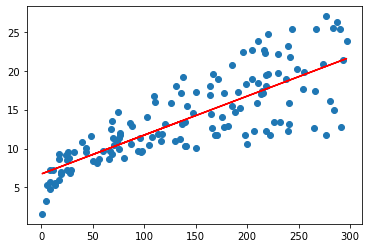

In [17]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.74+0.05*x_train,'r')

In [18]:
#error analysis

y_train_predict=lr.predict(x_train_sm)
res=y_train-y_train_predict

Text(0.5, 0, 'Residual errors')

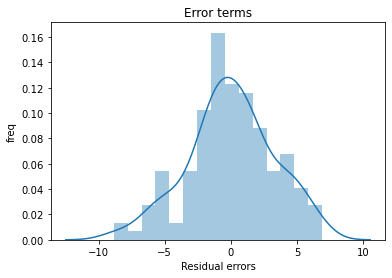

In [26]:
sns.distplot(res,bins=15)
plt.title('Error terms')
plt.ylabel('freq')
plt.xlabel('Residual errors')

In [27]:
x_test_sm=sm.add_constant(x_test)

In [32]:
y_test_predict=lr.predict(x_test_sm)
res_test=y_test-y_test_predict

Text(0.5, 0, 'Residual errors')

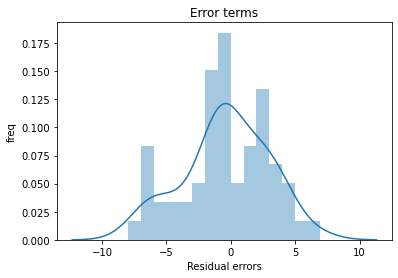

In [33]:
sns.distplot(res_test,bins=15)
plt.title('Error terms')
plt.ylabel('freq')
plt.xlabel('Residual errors')

In [34]:
from sklearn.metrics import r2_score
r_sq=r2_score(y_test,y_test_predict)

In [35]:
r_sq

0.5111616978794153

In [38]:
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 5)

In [51]:
x_train_lm =  x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [53]:
print(lm.intercept_)

6.745302251222065


In [54]:
print(lm.coef_)

[0.05024351]


In [55]:
y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

In [56]:
print(r2_score(y_train_lm, y_train_pred))

0.6411433688483876


In [57]:
print(r2_score(y_test_lm, y_test_pred))

0.5111616978794153
